### Logistic regression
邏輯回歸是一種分類(Classification)演算法
1. 用於分類問題中的廣義回歸演算法
2. 又稱"回歸"的線性分類器
3. Label為非連續值(二元、多元分類問題)



### Logistic Regression in Scikit-Learn
![image.png](./img/LogisticRegression.jpg)

In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

In [2]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [4]:
X = df_train.drop(labels=["variety","Class"],axis=1).values #移除 class,variety(因為字母不參與訓練)
#checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [5]:
#切割訓練集與測試集
from sklearn.model_selection import train_test_split

X = df_train.drop(labels=["Class","variety"],axis=1)
y = df_train["Class"]
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size = .3 , random_state=42)

In [6]:
print("Training data shape : ",X_train.shape)
print("Testing data shape : ", X_test.shape)

Training data shape :  (105, 4)
Testing data shape :  (45, 4)


### 建立 Logistic regression模型
邏輯回歸是由線性回歸變化而來的，屬判別模型適合解決二次分類問題

Parameters:
1. penalty : 正規化 l1/l2 , 防止模型過度擬合
2. C : 數值越大對weight(權重)的控制力越弱，預設為1
3. n_init : 預設為10次隨機初始化，選擇效果最好的一種來做為模型
4. solver : 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
5. max_iter : 迭代次數，預設為100代
6. class_weight : 若遇資料不平衡問題可以設定balance，預設=None
7. random_state : 亂數種子僅在solver = sag/liblinear時有用

Attributes:

1. coef_ : 取得斜率
2. intercept_ : 取得截距

Methods:
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. predict_proba : 預測每個類別的機率值
4. score : 預測成功的比例 

In [7]:
from sklearn.linear_model import LogisticRegression

#建立Logistic模型
logisticModel = LogisticRegression(random_state=0)

#使用訓練資料訓練模型
logisticModel.fit(X_train , y_train)

#使用訓練資料預測分類
predicted = logisticModel.predict(X_train)

### 使用Score評估模型

In [8]:
# 預測成功的比例
print("訓練集: ",logisticModel.score(X_train,y_train))
print("測試集: ",logisticModel.score(X_test,y_test) )

訓練集:  0.9619047619047619
測試集:  1.0


### 真實分類

In [9]:
#建立訓練集的 DataFrame
df_train = pd.DataFrame(X_train)
df_train["Class"] = y_train
#建立測試集的 DataFrame
df_test = pd.DataFrame(X_test)
df_test["Class"] = y_test

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


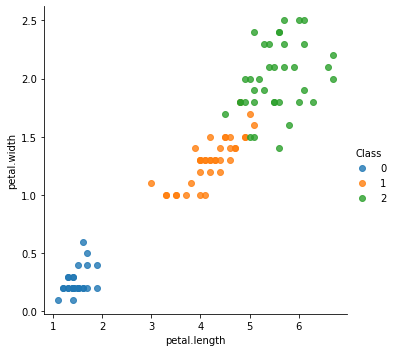

In [10]:
sns.lmplot("petal.length","petal.width",hue="Class",data=df_train,fit_reg=False)

### Logistic regression (訓練集)預測結果

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


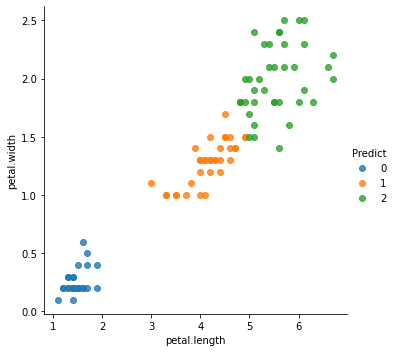

In [11]:
df_train["Predict"] = predicted
sns.lmplot("petal.length","petal.width",data=df_train,hue="Predict",fit_reg=False)
plt.show()